In [1]:
# Imports
import pandas as pd, matplotlib.pyplot as plt

# KNN Distributed - Execution details analysis

The well-known **K-Nearest Neighbor (KNN) classifier** has been **distributed with OpenMPI (on C++)**. <br>
But now a further analysis on the performances of the implemented solution is needed, considering different aspects for example what happens if the number of core is increased to the execution time (mantaining the number of samples fixed), and many other things

In order to do so, **four different clusters** have been created using **Google Cloud Platform** (GCP), with the following configurations:
- **Fat cluster**: three e2-highcpu-8 (8vCPU, 8GBRAM)
    - **Intra-regional**: same region (Central America)
    - **Infra-regional**: different regions (1 Central Europe, 1 East Asia, 1 West America)
- **Light cluster**: six e2-small (2vCPU, 2GBRAM)
    - **Intra-regional**: same region (Central America)
    - **Infra-regional**: different regions (2 Central Europe, 2 East Asia and 2 West America)

In this specific notebook it will be shown, and commented, the obtained results performing the distributed KNN on different previously designed tests, for each cluster.

# Fat cluser

## Intra-regional (same region )

**Strong scalability** (fixed-size problem on increasing resources - clusters of increasing dimension) has been studied through the computation of:
- **speed−up = [t(1) / t(n)]**

Where *t(1)* is the amount of time needed to complete the task with one process, while *t(n)* is the amount of time to complete the same task with n processing elements.
<br><br>

**Weak scalability** (increasing the number of cores, while keeping the load per core constant) has been studied through the computation of: 
- **efficiency = [t(1) / t(n)]**

Where *t(1)* is the amount of time to complete a work unit with one processing element, while *t(n)* is the amount of time to complete n of the same work units with n processing elements.

In [2]:
fat_intra_df = pd.read_csv('executions-details-fat-cluster-intra.csv', delimiter=', ', engine='python')
fat_intra_df


,N_SAMPLES,N_SLAVES,EXECUTION_TIME
0,1200,1,4.248240
1,12000,1,577.889000
2,24000,1,2522.450000
3,1200,4,1.108840
4,12000,4,149.880000
5,24000,4,645.486000
6,1200,8,0.826471
7,12000,8,104.675000
8,24000,8,461.487000
9,1200,12,0.593171


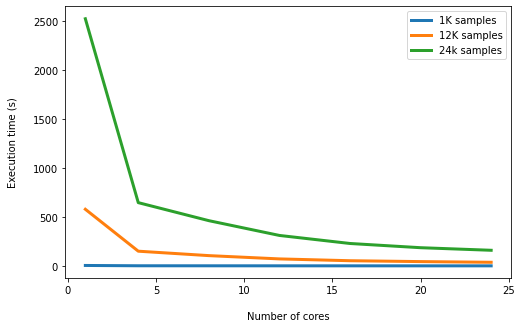

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))

for key, grp in fat_intra_df.groupby(['N_SAMPLES']):
    ax = grp.plot(ax=ax, kind='line', x='N_SLAVES', y='EXECUTION_TIME', legend=True, linewidth=3)

plt.legend(labels=['1K samples', '12K samples', '24k samples'], loc='best')
plt.xlabel('\nNumber of cores')
plt.ylabel('Execution time (s)\n')
plt.show()